# Topographies

In this notebook we examine the spatial distribution of spectral features on the scalp.

We do so by plotting topographies, using MNE, and compare spatial topographies of ratio measures to other spectral features, including for TBR and exponent as well as for ABR and alpha power.

In [1]:
%matplotlib inline

import csv

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from matplotlib import cm

import mne

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from settings import NUM_CHAN

In [3]:
# Load CSVs of data
data = pd.read_csv("../dat/ChildMind/MIPDB_PublicFile.csv")
df = pd.read_csv("../dat/ChildMind/spectral_measures_dataframe.csv")

In [4]:
# Read in list of channel names that are kept in reduced 111 montage
with open('../dat/ChildMind/chans111.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

# Create the info structure needed by MNE
info = mne.create_info(ch_labels, 500, 'eeg', montage)

# Create the MNE Raw data object
raw = mne.io.RawArray(np.zeros([111, 1]), info, verbose=False)

Below we calculate the mean of relevant spectral features across subjects for each channel.

In [5]:
exps = np.zeros(NUM_CHAN)
alpha_pw = np.zeros(NUM_CHAN)
tbrs = np.zeros(NUM_CHAN)
abrs = np.zeros(NUM_CHAN)

for chan in range(NUM_CHAN):
    exps[chan] = df[df.Chan_ID == chan].Exp.mean()
    alpha_pw[chan] = df[df.Chan_ID == chan].Alpha_PW.mean()
    tbrs[chan] = df[df.Chan_ID == chan].TBR.mean()
    abrs[chan] = df[df.Chan_ID == chan].ABR.mean()
        
params = [exps, alpha_pw, tbrs, abrs]
str_params = ["exps","alpha_pw",'tbrs','abrs']

## Spacial Topographies of Exponent and TBR

Below we plot the spacial topographies for the spectral features and show how similar these distributions are by calculating the spearman correlation.

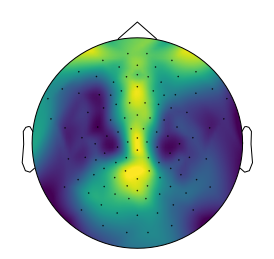

In [6]:
# Topography of TBRs
fig, ax = plt.subplots();
mne.viz.plot_topomap(tbrs, raw.info, vmin=min(tbrs), vmax=max(tbrs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("TBR");
fig.savefig('../figures/RealData/topos/' + 'TBR-topo.pdf');

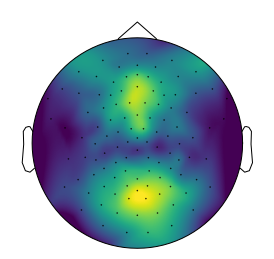

In [7]:
# Topography of aperiodic exponent
fig, ax = plt.subplots();
mne.viz.plot_topomap(exps, raw.info, vmin=min(exps), vmax=max(exps), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Exp");
fig.savefig('../figures/RealData/topos/' + 'EXP-topo.pdf');

In [8]:
# Calculate correlation between spatial topographies\n
print("Correlation between EXP and TBR is {:1.4f} with a p-value of {:1.4f}.".format(*spearmanr(tbrs, exps)))

Correlation between EXP and TBR is 0.6704 with a p-value of 0.0000.


## Spacial Topographies of Alpha PW and ABR

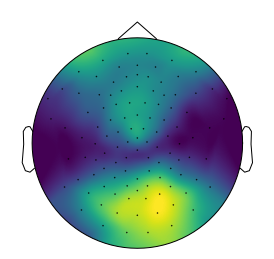

In [9]:
# Topography of ABRs
fig, ax = plt.subplots();
mne.viz.plot_topomap(abrs, raw.info, vmin=min(abrs), vmax=max(abrs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("ABR");
fig.savefig('../figures/RealData/topos/' + 'ABR-topo.pdf');

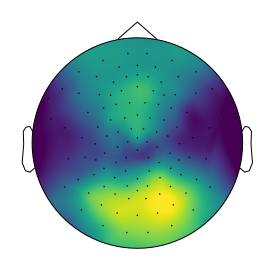

In [10]:
# Topography of Alpha Power
fig, ax = plt.subplots();
mne.viz.plot_topomap(alpha_pw, raw.info, vmin=min(alpha_pw), vmax=max(alpha_pw), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("alpha_pw");
fig.savefig('../figures/RealData/topos/' + 'APW-topo.pdf');

In [11]:
# Calculate correlation between spatial topographies of ABR & alpha power
print("Correlation between Alpha Power and ABR is {:1.4f} with a p-value of {:1.4f}.".format(*spearmanr(abrs, alpha_pw)))

Correlation between Alpha Power and ABR is 0.9689 with a p-value of 0.0000.
